In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open("dataset_training_raw.json", "r") as f:
    all_data = json.load(f)
del f

In [3]:
for dataset in all_data.values():
    no_samples = len(dataset)
    break

angles_30weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30weighted[s,:] = all_data["0.3 weighted"][str(s)][1]
    angles_30weighted[s,:3] = np.mod( angles_30weighted[s, :3], np.pi/2 )
    angles_30weighted[s,3:] *= -1

angles_30nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30nonweight[s,:] = all_data["0.3 nonweighted"][str(s)][1]
    angles_30nonweight[s,:3] = np.mod( angles_30nonweight[s, :3], np.pi/2 )
    angles_30nonweight[s,3:] *= -1

angles_70weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70weighted[s,:] = all_data["0.7 weighted"][str(s)][1]
    angles_70weighted[s,:3] = np.mod( angles_70weighted[s, :3], np.pi/2 )
    angles_70weighted[s,3:] *= -1

angles_70nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70nonweight[s,:] = all_data["0.7 nonweighted"][str(s)][1]
    angles_70nonweight[s,:3] = np.mod( angles_70nonweight[s, :3], np.pi/2 )
    angles_70nonweight[s,3:] *= -1

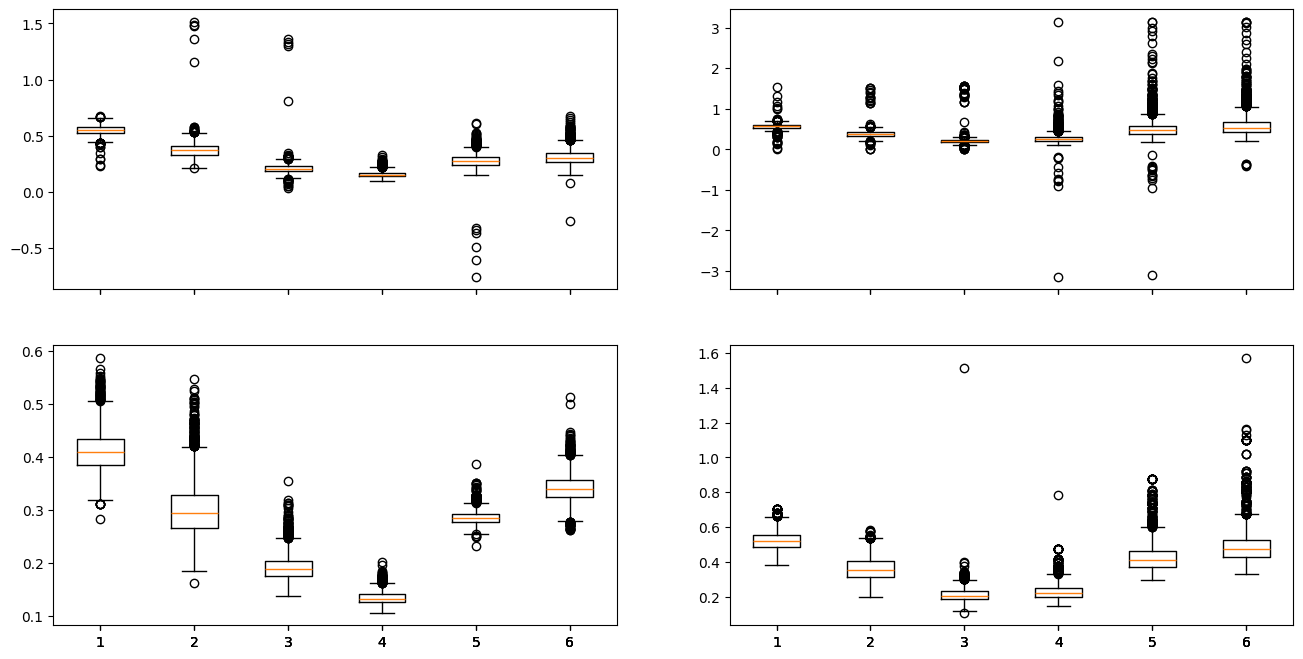

In [4]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))
axs[0,0].boxplot(angles_70weighted)
axs[0,1].boxplot(angles_30weighted)
axs[1,0].boxplot(angles_70nonweight)
axs[1,1].boxplot(angles_30nonweight)
plt.show()

In [9]:
np.where( np.isnan(angles_30nonweight) == True )

(array([], dtype=int64), array([], dtype=int64))

In [11]:
samples = set({})
for s in range(no_samples):
    for instance in ["0.3 weighted", "0.7 weighted", "0.3 nonweighted","0.7 nonweighted"]:
        sample = all_data[instance][str(s)]
        input_J = sample[0]
        angle = np.array( sample[1] )
        angle[:3] = np.mod( angle[:3], np.pi/2 )
        angle[3:] *= -1
        angle = list(angle)
        skip = False
        for val in angle:
            if val < 0 or val > 1:
                skip = True
                break
        if not skip:
            samples.add((tuple(input_J), tuple(angle)))
print(len(samples))

15738


In [47]:
import random
#Split into training and validation set
samples = list(samples)
random.shuffle(list(samples))

In [53]:
training_set = samples[:6300]
validation_set = samples[6300:]